# Projeto Final - Tera - Data Science
Notebooks destinados ao desenvolvimento do projeto final do treinamento Tera - Data Science
## EDA
1. Objetivo:
    1. Identificar padrões nos dados
    2. Identificar anomalias nos dados
2. Output:
    1. DataSet processado e com as anomalias tratadas
    2. Insights para sequência das análises do projeto

In [1]:
# Bibliotecas Padrões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Lendo os arquivos em csv
df_features = pd.read_csv('../data/raw/features.csv')
df_stores = pd.read_csv('../data/raw/stores.csv')
df_train = pd.read_csv('../data/raw/train.csv')

In [3]:
# Unindo os dfs para tratamento
df_model = df_train.merge(df_features.drop(columns=['IsHoliday']), how='left', on=['Store', 'Date'])
df_model = df_model.merge(df_stores, how='left', on=['Store'])

# Display
df_model

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


### Data Cleaning

In [4]:
# Data Preprocessing
df_model.IsHoliday = df_model.apply(lambda row: 1 if row['IsHoliday'] == True else 0, axis=1)
df_model.Type = df_model.apply(lambda row: 3 if row['Type'] == 'A' else 2 if row['Type'] == 'B' else 1, axis=1)
df_model = df_model.fillna(0)
df_model.Date = pd.to_datetime(df_model.Date)

# Ordenando valores
df_model = df_model.sort_values(by=['Store', 'Date'])

# Display
df_model

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
143,1,2,2010-02-05,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
286,1,3,2010-02-05,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
429,1,4,2010-02-05,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
572,1,5,2010-02-05,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421146,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421289,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421434,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


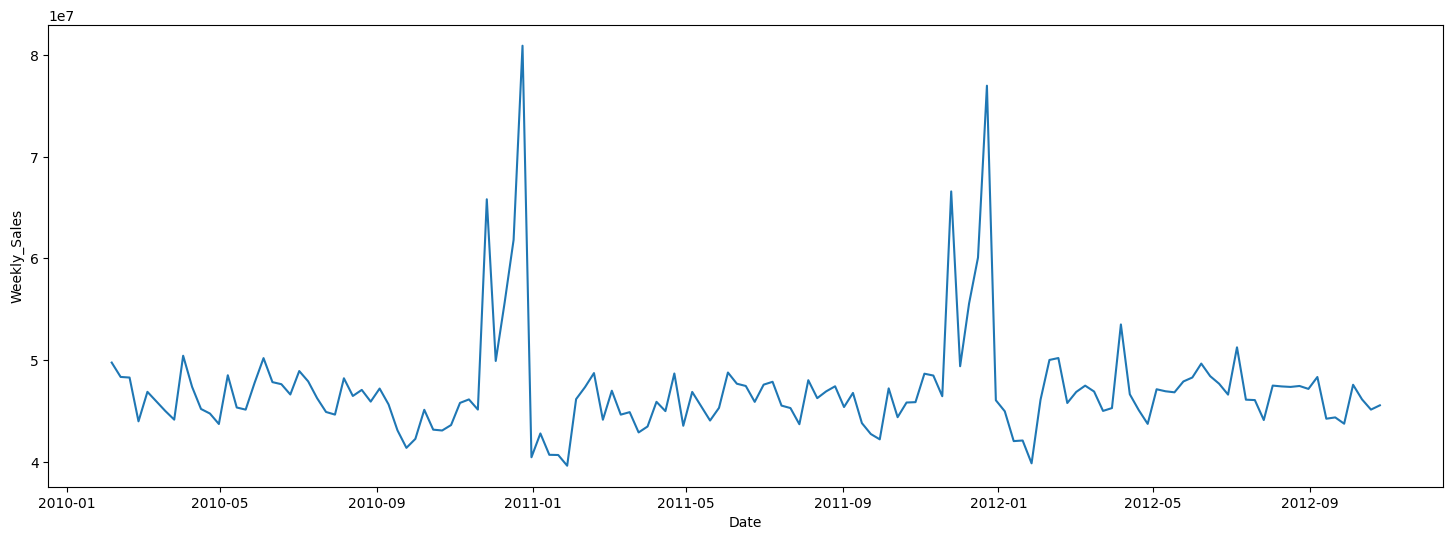

In [5]:
df_plot = pd.DataFrame(df_model.groupby('Date')['Weekly_Sales'].sum()).reset_index()

fig, ax = plt.subplots(figsize=[18,6])

ax = sns.lineplot(
    x='Date',
    y='Weekly_Sales',
    data=df_plot
)

plt.show()

del df_plot

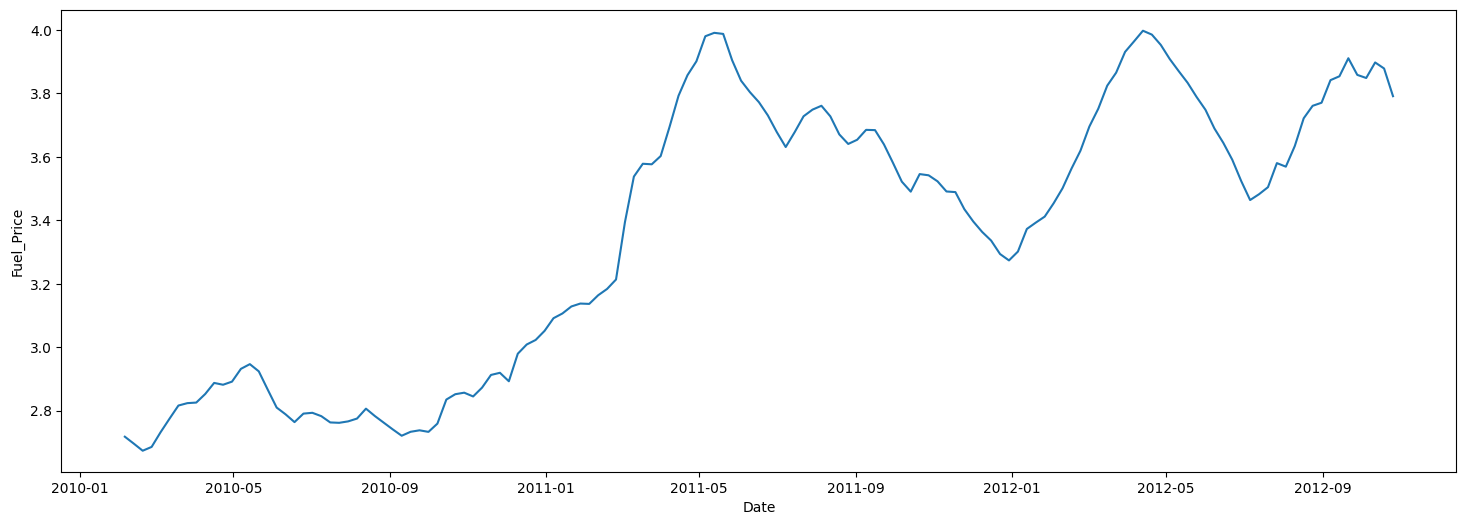

In [6]:
df_plot = pd.DataFrame(df_model.groupby('Date')['Fuel_Price'].mean()).reset_index()

fig, ax = plt.subplots(figsize=[18,6])

ax = sns.lineplot(
    x='Date',
    y='Fuel_Price',
    data=df_plot
)

plt.show()

del df_plot

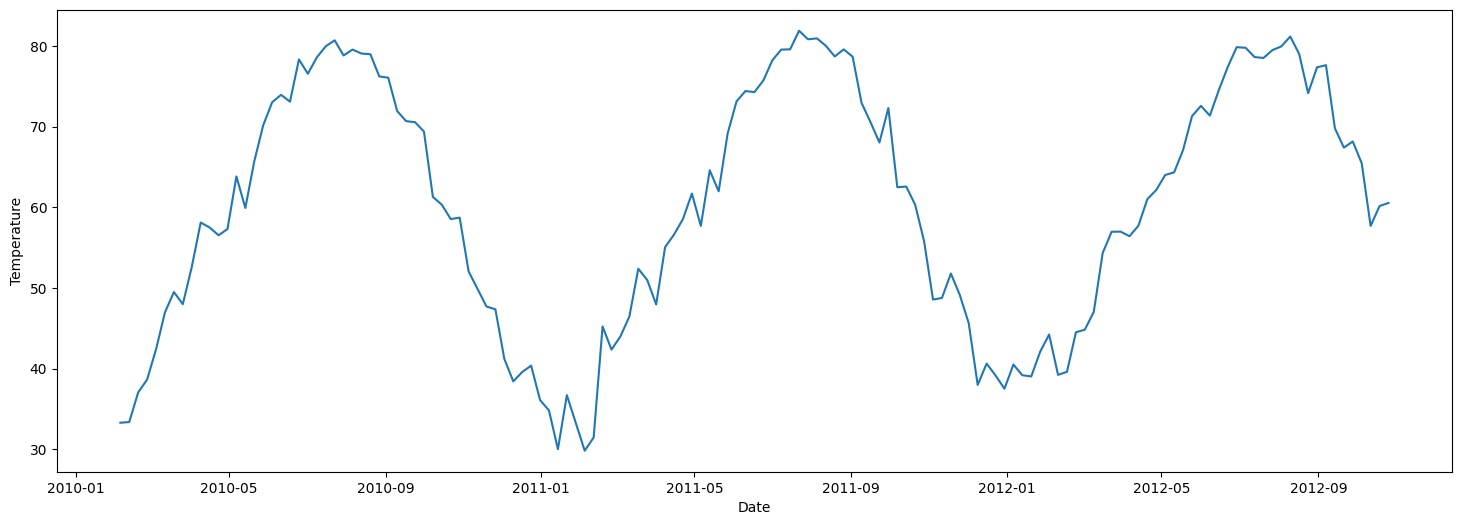

In [7]:
df_plot = pd.DataFrame(df_model.groupby('Date')['Temperature'].mean()).reset_index()

fig, ax = plt.subplots(figsize=[18,6])

ax = sns.lineplot(
    x='Date',
    y='Temperature',
    data=df_plot
)

plt.show()

del df_plot

/tmp/ipykernel_117/1309880544.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_model.corr(), cbar=True, annot=True)


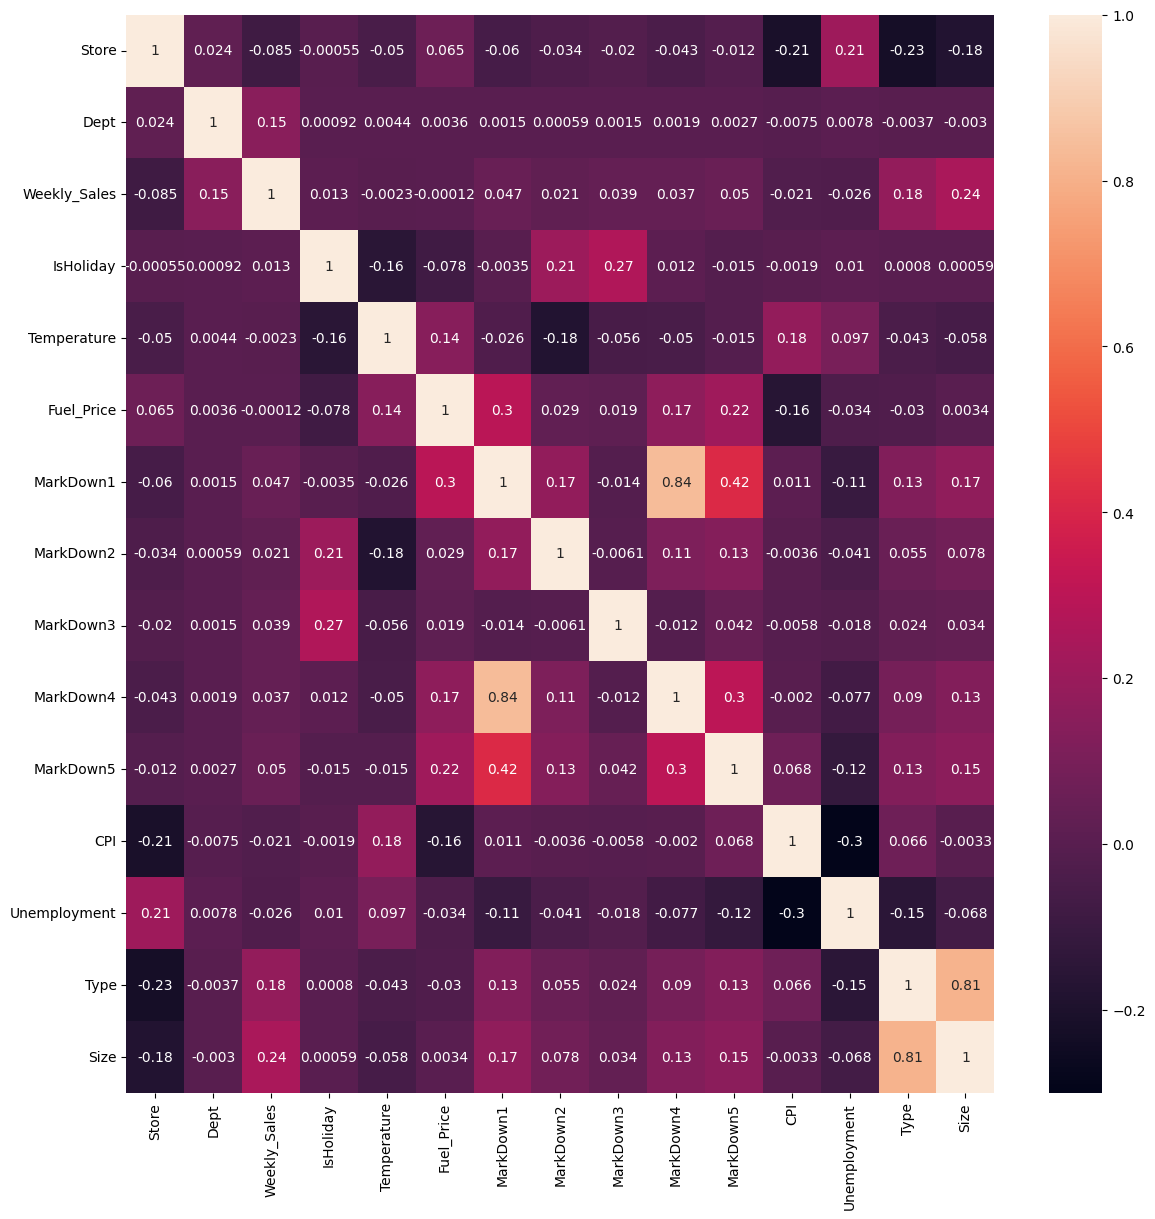

In [8]:
plt.figure(figsize=[14,14])

sns.heatmap(df_model.corr(), cbar=True, annot=True)

plt.show()

In [10]:
# Selecionando features: store, dept, isholiday, size, markdown5
df_model = df_model[['Date', 'IsHoliday', 'Store', 'Size', 'Dept', 'MarkDown5', 'Weekly_Sales']]

# Display
df_model

,Date,IsHoliday,Store,Size,Dept,MarkDown5,Weekly_Sales
0,2010-02-05,0,1,151315,1,0.00,24924.50
143,2010-02-05,0,1,151315,2,0.00,50605.27
286,2010-02-05,0,1,151315,3,0.00,13740.12
429,2010-02-05,0,1,151315,4,0.00,39954.04
572,2010-02-05,0,1,151315,5,0.00,32229.38
...,...,...,...,...,...,...,...
421012,2012-10-26,0,45,118221,93,858.33,2487.80
421146,2012-10-26,0,45,118221,94,858.33,5203.31
421289,2012-10-26,0,45,118221,95,858.33,56017.47
421434,2012-10-26,0,45,118221,97,858.33,6817.48


### Salvando Df

In [11]:
df_model.to_csv('../data/df_model.csv', sep=';', index=False)